In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from PIL import Image, ImageOps
from numpy import asarray

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv("/content/drive/MyDrive/train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
data=data.values

In [5]:
#Cleaning data
pixels=data[:,1:]
label=data[:,0]

In [6]:
#Splitting data into train and test 
pixels_train=pixels[:41000,:]
pixels_test=pixels[41000:,:]
label_train=label[:41000]
label_test=label[41000:]

In [7]:
#Function to calculate distance between various points
def distance(x,x1):
  dis=np.sqrt(sum((x-x1)**2))
  return dis

In [8]:
#KNN model
def knn(pixels,label,querypoint,k=10):
  store=[]
  size=pixels.shape[0]
  for i in range(size):
    d=distance(querypoint,pixels[i])
    store.append((d,label[i]))
  store=sorted(store)
  store=store[:k]
  store=np.array(store)
  array=np.unique(store[:,1],return_counts=True)
  index=array[1].argmax()
  predicted=array[0][index]
  return predicted

In [9]:
#Function to draw image using values of pixels in array
def draw(arr):
  img=arr.reshape(28,28)
  plt.imshow(img,cmap='gray')
  plt.show()

In [10]:
#Calculating accuracy of array
def accuracy(pix_train,lab_train,pix_test,lab_test):
  size=pix_test.shape[0]
  cnt=0
  for i in range(size):
    pred=knn(pix_train,lab_train,pix_test[i])
    if(pred==lab_test[i]):
      cnt=cnt+1
  acc=cnt/size
  return acc

In [11]:
#Converting an image to array
def imgtoarr(img):
  imggray=ImageOps.grayscale(img)
  small=imggray.resize((28,28))
  testing=asarray(small)
  tempo=testing.reshape(784,)
  return tempo

In [ ]:
ans=knn(pixels_train,label_train,pixels_test[0])
ans

2.0

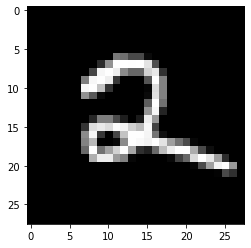

In [ ]:
draw(pixels_test[0])

In [ ]:
acc=accuracy(pixels_train,label_train,pixels_test,label_test)

In [ ]:
acc

0.967

In [ ]:
input=Image.open("/content/drive/MyDrive/22.jpeg")

In [ ]:
inp=imgtoarr(input)
inp

array([  4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,
         4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,
         4,   4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,  46,  92, 103,  72,  25,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  75, 191, 249, 255, 255, 255, 234,
       149,  17,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  12, 152, 254, 255, 255, 255, 255,
       255, 255, 255, 145,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   8, 174, 255, 255, 25

In [ ]:
ans=knn(pixels_train,label_train,inp)

In [ ]:
ans

2.0

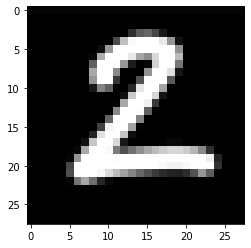

In [ ]:
draw(inp)